In this Notebook I am trying to do some analysis of the Opinion Texts. I look for keywords in the headnotes of each case and classify each reversed case by the type of crime committed.

In [46]:
from bs4 import BeautifulSoup
import os
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
folder = 'Reversal Opinions HTML'
links = []
for file in os.listdir(folder):
    # only add the HTML files, not the subfolders, use a period to tell
    if '.' in file:
        links.append(file)
        
textDict = {}
for fname in links:
    f = open(folder + "\\"+ fname, encoding='utf8')
    s = BeautifulSoup(f.read(), 'lxml')
    for el in s.find_all("span", class_="SS_it"):
        if 'v.' not in el.text and "vs." not in el.text:
            if fname not in textDict:
                textDict[fname] = el.text.lower()
            else:
                textDict[fname] += el.text.lower()
textDict

{'SJC-10111.html': "threshold police inquiryconstitutional lawpractice, criminalevidencebackgroundtraffic stopp.mbmotion to suppressmoreone-halflesslegitimatemotion for rehearing and the joint motion to vacatesicdiscussionselective enforcementid.suppression as remedyfranklinstatistical evidenceid.idid.id.idid.id.id.id.id.id.lora's evidenceconclusionneverso orderedanteanteanteididid.id.idid.anteanteid.lesssupraid.id.sotoid.sotosotoidpostpost",
 'SJC-10114.html': 'practice, criminalconstitutional lawsearch and seizurebackgroundaappellate proceedingeffectiveidid.id.kegleralvarezkegleralvarezkeglerkeglerkegleralvarezkeglerfrankidmotion to suppressconclusionso ordered',
 'SJC-10120.html': "jury and jurorspractice, criminalconstitutional lawself-defenseevidenceperemptory challengebackgroundthe jurorthe judgethe jurorthe prosecutorthe judgethe prosecutorthe judgesicdiscussionsoaress.c.,soaresmaldonadoididmaldonado, supraadequategenuinesoaressupramaldonado,postmaldonado, supra.maldonadomaldona

In [57]:
# categories we want to classify the cases under
cats = {'homicide': 0,
        'bande': 0,
        'assault': 0,
        'sexual assault/rape': 0,
        'weapon crime': 0,
        'other': 0,
        'drugs': 0,
        'traffic':0,
        'other':0
       }
for key,val in textDict.items():
    if "homicide" in val or "murder" in val:
        cats['homicide'] += 1
    elif 'rape' in val or 'sex offender' in val:
        cats['sexual assault/rape'] += 1
    elif 'firearm' in val:
        cats['weapon crime'] += 1
    elif 'assault' in val:
        cats['assault'] += 1
    elif 'breaking and entering' in val:
        cats['bande'] += 1
    elif 'controlled substance' in val:
        cats['drugs'] += 1
    elif 'traffic stop' in val or 'vehicle' in val:
        cats['traffic'] += 1
    else:
        #print(key)
        cats['other'] += 1
cats

{'assault': 9,
 'bande': 3,
 'drugs': 17,
 'homicide': 20,
 'other': 47,
 'sexual assault/rape': 9,
 'traffic': 7,
 'weapon crime': 13}

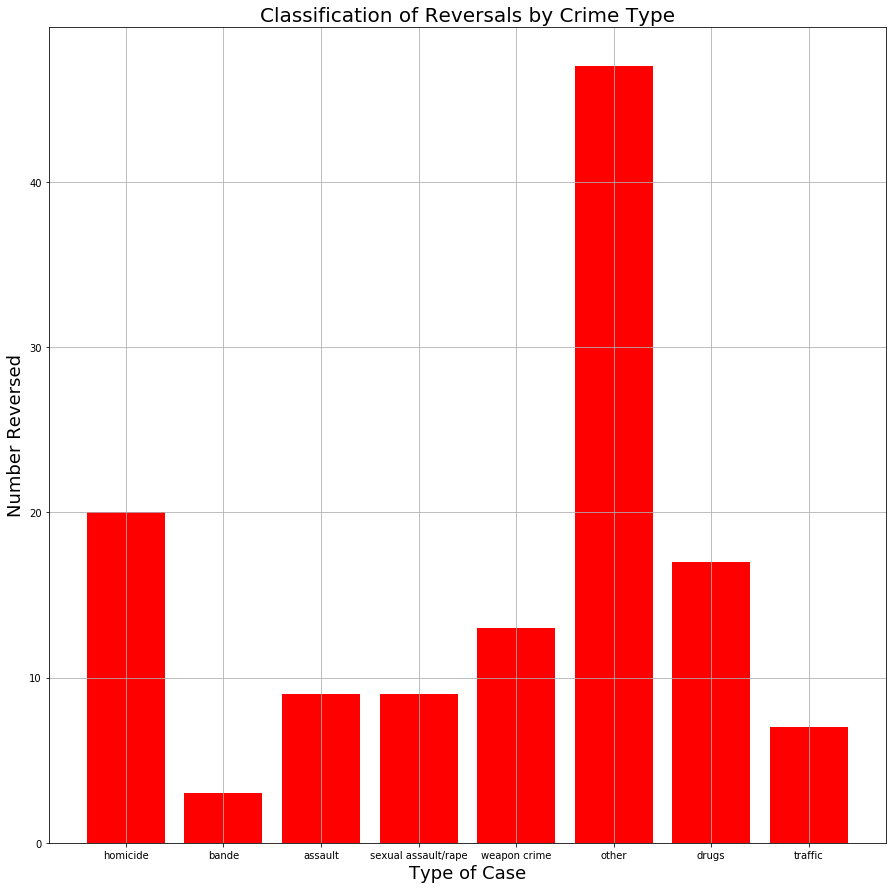

In [60]:
plt.figure(figsize=(15,15))
plt.bar(range(len(cats)), list(cats.values()), align='center', color='r')
plt.xticks(range(len(cats)), list(cats.keys()))
plt.xlabel('Type of Case', fontsize=18)
plt.ylabel('Number Reversed', fontsize=18)
plt.title('Classification of Reversals by Crime Type', fontsize=20)
plt.legend()
plt.grid(True)
plt.show
plt.savefig("reversaltypeplot.png", dpi=500)